In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import probplot
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df= pd.read_csv('weight-height.csv')

df.head(10)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676


In [2]:
print("The size of dataset is: ",df.shape)  # identify the size of of the dataset
print( "length is: ",len(df.columns))  # identify the number of features
print("Columns in dataset: ",df.columns) # idenfity the features
print("If any NULL value",df.isnull().values.any()) # checking if dataset has empty cells
print("Num of empty cells: ",df.isnull().sum()) # identify the number of empty cells


The size of dataset is:  (10000, 2)
length is:  2
Columns in dataset:  Index(['Height', 'Weight'], dtype='object')
If any NULL value False
Num of empty cells:  Height    0
Weight    0
dtype: int64


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Q-Q plot of 'Weight'")

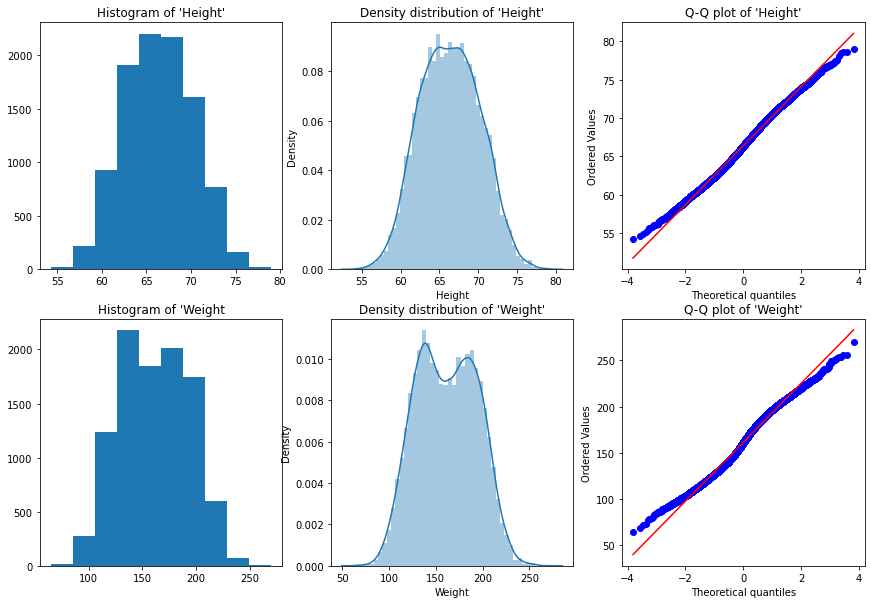

In [3]:
# Histogram
# We can use either plt.hist or sns.histplot
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.hist(df['Height'], density=False)
plt.title("Histogram of 'Height'")
plt.subplot(2,4,5)
plt.hist(df['Weight'], density=False)
plt.title("Histogram of 'Weight")

# Density plot
plt.subplot(2,4,2)
sns.distplot(df['Height'], kde=True)
plt.title("Density distribution of 'Height'")
plt.subplot(2,4,6)
sns.distplot(df['Weight'], kde=True)
plt.title("Density distribution of 'Weight'")

# Normal Q-Q plot
plt.subplot(2,4,3)
probplot(df['Height'], plot=plt)
plt.title("Q-Q plot of 'Height'")
plt.subplot(2,4,7)
probplot(df['Weight'], plot=plt)
plt.title("Q-Q plot of 'Weight'")


In [4]:
# Def a function to run Shapiro test

# Defining our Null, Alternate Hypothesis
Ho = 'Data is Normal'
Ha = 'Data is not Normal'

# Defining a significance value
alpha = 0.05
def normality_check(df):
    for columnName, columnData in df.iteritems():
        print("Shapiro test for {columnName}".format(columnName=columnName))
        res = stats.shapiro(columnData)
#         print(res)
        pValue = round(res[1], 2)
        
        # Writing condition
        if pValue > alpha:
            print("pvalue = {pValue} > {alpha}. We fail to reject Null Hypothesis. {Ho}".format(pValue=pValue, alpha=alpha, Ho=Ho))
        else:
            print("pvalue = {pValue} <= {alpha}. We reject Null Hypothesis. {Ha}".format(pValue=pValue, alpha=alpha, Ha=Ha))
        
        
# Drive code
normality_check(df)

Shapiro test for Height
pvalue = 0.0 <= 0.05. We reject Null Hypothesis. Data is not Normal
Shapiro test for Weight
pvalue = 0.0 <= 0.05. We reject Null Hypothesis. Data is not Normal


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Text(0.5, 1.0, 'Line plot of Height, Weight')

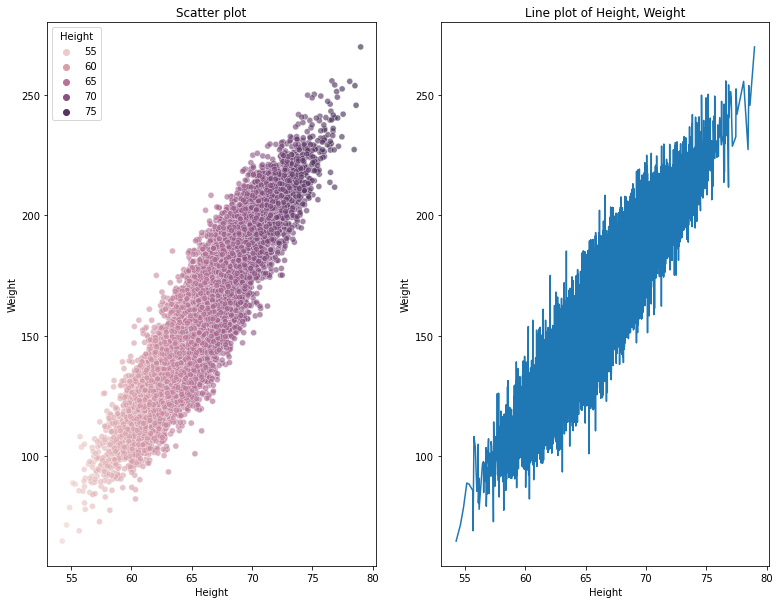

In [5]:
# Scatterplot & Line plots
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.scatterplot(data=df, x="Height", y="Weight", hue="Height", alpha=0.6)
plt.title("Scatter plot")

plt.subplot(1,3,2)
sns.lineplot(data=df, x="Height", y="Weight")
plt.title("Line plot of Height, Weight")


Text(0.5, 1.0, 'Joint plot using sns')

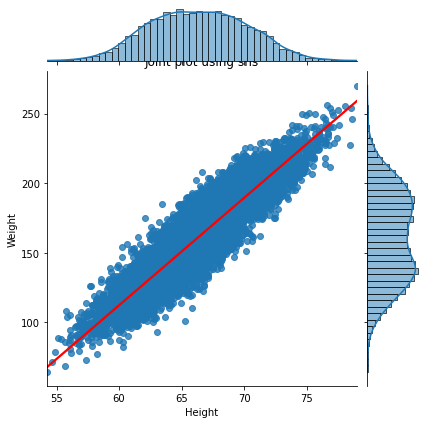

In [6]:
# Joint plot
sns.jointplot(x = "Height", y = "Weight", kind = "reg", data = df,  joint_kws={'line_kws':{'color':'red'}})
plt.title("Joint plot using sns")
# kind can be hex, kde, scatter, reg, hist. When kind='reg' it shows the best fit line.

Correlation: n           Height    Weight
Height  1.000000  0.924756
Weight  0.924756  1.000000


<AxesSubplot:>

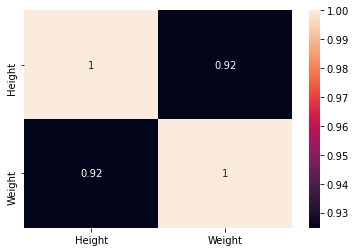

In [7]:
print("Correlation: "+ 'n', df.corr()) # 0.92 which is high positive correlation

# Draw a heatmap for correlation matrix
plt.subplot(1,1,1)
sns.heatmap(df.corr(), annot=True)

### This means the dependent variable increases as the independent variable increases.



In [8]:
# Create new columns for the normalized values
df['Norm_Height'] = preprocessing.normalize(df[['Height']], axis=0)
df['Norm_Weight'] = preprocessing.normalize(df[['Weight']], axis=0)
df.head()

,Height,Weight,Norm_Height,Norm_Weight
0,73.847017,241.893563,0.011108,0.014696
1,68.781904,162.310473,0.010346,0.009861
2,74.110105,212.740856,0.011148,0.012925
3,71.730978,220.042470,0.010790,0.013368
4,69.881796,206.349801,0.010512,0.012536


nCoeff of the predictor:  [[0.11081279]]
Intercept:  [48.47790261]
Mean squared error(MSE): 2.14
Coefficient of determination: 0.855
nCoeff of the predictor:  [[3.11683479]]
Intercept:  [-0.02130819]
Mean squared error(MSE): 0.00
Coefficient of determination: 0.855


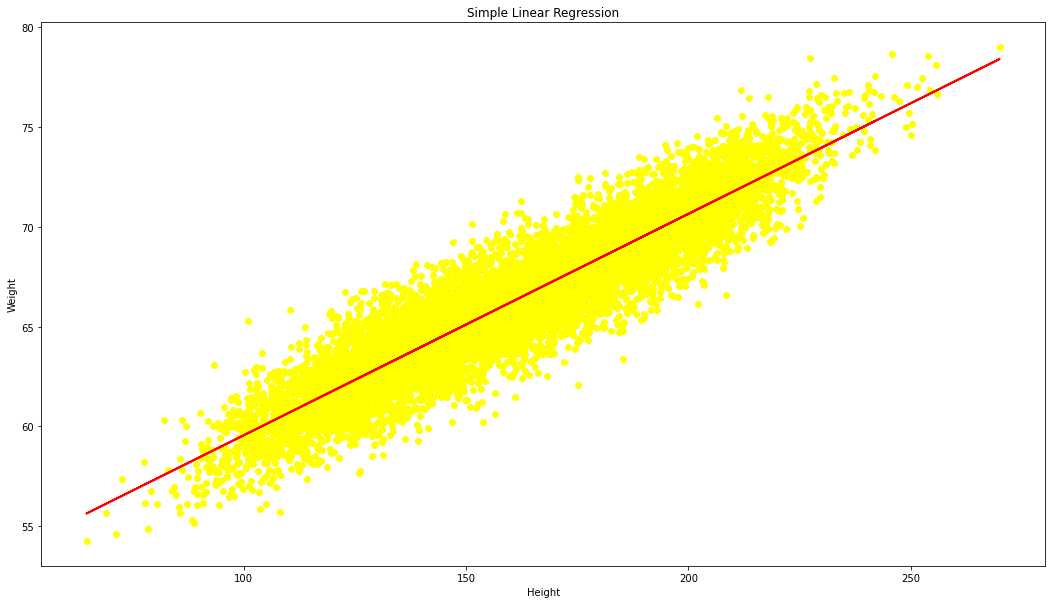

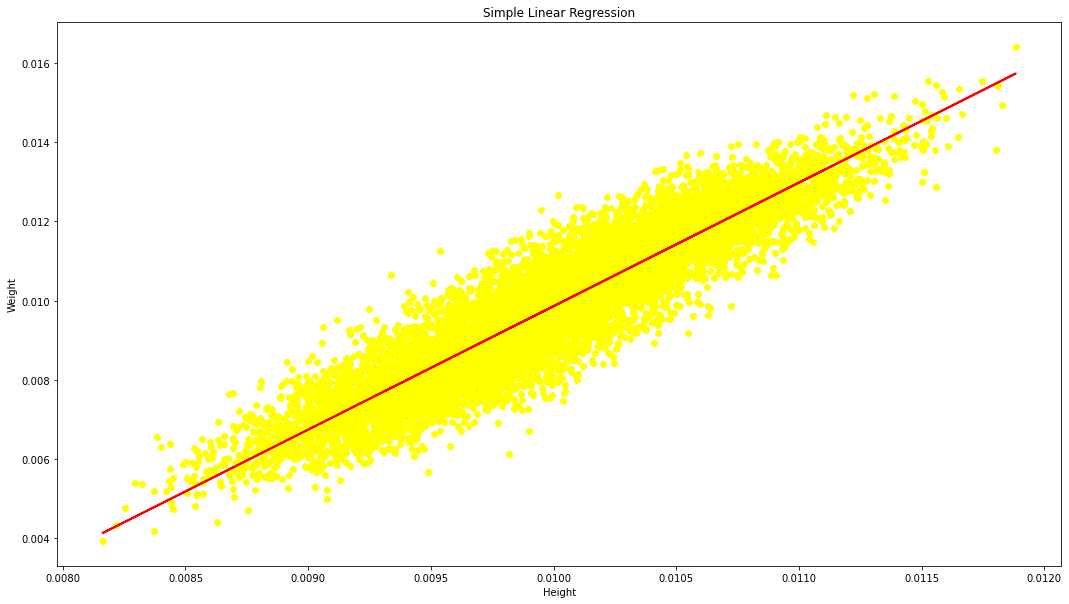

In [9]:
def regression(df):
#defining the independent and dependent features
    x = df.iloc[:, 1:2]
    y = df.iloc[:, 0:1]

    # Instantiating the LinearRegression object
    regressor = LinearRegression()
    
    # Training the model
    regressor.fit(x,y)

    # Checking the coefficients for the prediction of each of the predictor
    print('n'+"Coeff of the predictor: ",regressor.coef_)
    
    # Checking the intercept
    print("Intercept: ",regressor.intercept_)

    # Predicting the output
    y_pred = regressor.predict(x)

    # Checking the MSE
    print("Mean squared error(MSE): %.2f" % mean_squared_error(y, y_pred))
    
    # Checking the R2 value
    print("Coefficient of determination: %.3f" % r2_score(y, y_pred)) # Evaluates the performance of the model 
    # says much percentage of data points are falling on the best fit line
    
    # visualizing the results.
    plt.figure(figsize=(18, 10))
    
    # Scatter plot of input and output values
    plt.scatter(x, y, color='yellow')
    
    # plot of the input and predicted output values
    plt.plot(x, regressor.predict(x), color='Red', linewidth=2 )
    plt.title('Simple Linear Regression')
    plt.xlabel('Height')
    plt.ylabel('Weight')
    
    
# calling the function
regression(df[['Height', 'Weight']]) 
regression(df[['Norm_Weight', 'Norm_Height']]) 

In [10]:
def smf_ols(df):
    # defining the independent and dependent features
    x = df.iloc[:, 1:2]
    y = df.iloc[:, 0:1] 

    # train the model
    model = smf.ols('y~x', data=df).fit()
    
    # print model summary
    print(model.summary())
    
    # Predict y
    y_pred = model.predict(x)

    y_lst = y.Weight.values.tolist()
#     y_lst = y.iloc[:, -1:].values.tolist()
    y_pred_lst = y_pred.tolist()
        
    data = [y_lst, y_pred_lst]
#     print(data)
    res = pd.DataFrame({'Actuals':data[0], 'Predicted':data[1]})
#     print(res)

# call the function
smf_ols(df[['Weight', 'Height']]) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.904e+04
Date:                Mon, 31 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:48:07   Log-Likelihood:                -39219.
No. Observations:               10000   AIC:                         7.844e+04
Df Residuals:                    9998   BIC:                         7.846e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -350.7372      2.111   -166.109      0.0